## K-Means Clusteing for Pokemon stats and Types

# Install and import Library

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


# Load the Dataset

In [ ]:
datapath = "..\data\Tabular Dataset.csv"
df = pd.read_csv(datapath)   
df.head(5)


,National\nDex,Pokemon\nName,HP,Attack,Defense,Special\nAttack,Special\nDefense,Speed,Total,Ability I,Ability II,Hidden Ability,Weight (kg),Height (m),Pokedex Color,Egg Group I,Egg Group II,Type I,Type II
0,1.0,Bulbasaur,45,49,49,65,65,45,318,Overgrow,NaN,Chlorophyll,6.9,0.7,Green,Monster,Grass,Grass,Poison
1,2.0,Ivysaur,60,62,63,80,80,60,405,Overgrow,NaN,Chlorophyll,13.0,1.0,Green,Monster,Grass,Grass,Poison
2,3.0,Venusaur,80,82,83,100,100,80,525,Overgrow,NaN,Chlorophyll,100.0,2.0,Green,Monster,Grass,Grass,Poison
3,3.1,Venusaur (Mega),80,100,123,122,120,80,625,Thick Fat,NaN,NaN,155.5,2.4,Green,Monster,Grass,Grass,Poison
4,4.0,Charmander,39,52,43,60,50,65,309,Blaze,NaN,Solar Power,8.5,0.6,Red,Monster,Dragon,Fire,NaN


# Data info

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   National
Dex     1236 non-null   float64
 1   Pokemon
Name     1236 non-null   object 
 2   HP               1236 non-null   int64  
 3   Attack           1236 non-null   int64  
 4   Defense          1236 non-null   int64  
 5   Special
Attack   1236 non-null   int64  
 6   Special
Defense  1236 non-null   int64  
 7   Speed            1236 non-null   int64  
 8   Total            1236 non-null   int64  
 9   Ability I        1235 non-null   object 
 10  Ability II       609 non-null    object 
 11  Hidden Ability   939 non-null    object 
 12  Weight (kg)      1236 non-null   float64
 13  Height (m)       1236 non-null   float64
 14  Pokedex Color    1236 non-null   object 
 15  Egg Group I      1235 non-null   object 
 16  Egg Group II     320 non-null    object 
 17  Type I        

In [47]:
df.describe()

,National\nDex,HP,Attack,Defense,Special\nAttack,Special\nDefense,Speed,Total,Weight (kg),Height (m)
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000
mean,505.812945,71.059871,80.869741,74.554207,73.458738,72.260518,70.226537,442.437702,72.312379,1.279369
std,297.451415,26.198025,31.922122,30.171029,32.607330,27.158824,30.075217,118.860413,132.372893,1.355542
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,0.000000,0.000000
25%,247.750000,54.000000,56.000000,51.000000,50.000000,50.000000,45.750000,335.000000,8.675000,0.500000
50%,503.550000,70.000000,80.000000,70.000000,65.000000,70.000000,69.000000,465.000000,29.600000,1.000000
75%,758.250000,85.000000,100.000000,90.000000,95.000000,90.000000,91.000000,520.000000,75.000000,1.600000
max,1025.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,999.900000,20.000000


In [48]:
scaler = StandardScaler()
df[['HP_T', 'Attack_T', 'Defense_T', 'Special\nAttack_T', 'Special\nDefense_T', 'Speed_T', 'Total_T']] = scaler.fit_transform(df[['HP', 'Attack', 'Defense', 'Special\nAttack', 'Special\nDefense', 'Speed', 'Total']])
df.head()

,National\nDex,Pokemon\nName,HP,Attack,Defense,Special\nAttack,Special\nDefense,Speed,Total,Ability I,...,Egg Group II,Type I,Type II,HP_T,Attack_T,Defense_T,Special\nAttack_T,Special\nDefense_T,Speed_T,Total_T
0,1.0,Bulbasaur,45,49,49,65,65,45,318,Overgrow,...,Grass,Grass,Poison,-0.995129,-0.998763,-0.847321,-0.259517,-0.267444,-0.839121,-1.047347
1,2.0,Ivysaur,60,62,63,80,80,60,405,Overgrow,...,Grass,Grass,Poison,-0.422335,-0.591357,-0.383112,0.200688,0.285087,-0.340170,-0.315099
2,3.0,Venusaur,80,82,83,100,100,80,525,Overgrow,...,Grass,Grass,Poison,0.341390,0.035421,0.280044,0.814296,1.021794,0.325099,0.694897
3,3.1,Venusaur (Mega),80,100,123,122,120,80,625,Thick Fat,...,Grass,Grass,Poison,0.341390,0.599522,1.606356,1.489264,1.758501,0.325099,1.536560
4,4.0,Charmander,39,52,43,60,50,65,309,Blaze,...,Dragon,Fire,NaN,-1.224247,-0.904746,-1.046268,-0.412919,-0.819974,-0.173853,-1.123097


# 1D Clustering for each stats wtih the total stats vs Types (KMeans)

Plot each of the attributes

Elbow method to find the best number of cluster


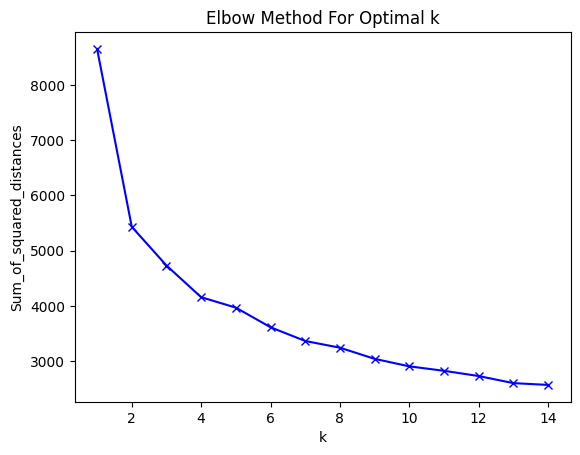

In [50]:
#create a elbow plot to find the optimal number of clusters is 3
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df[['HP_T', 'Attack_T', 'Defense_T', 'Special\nAttack_T', 'Special\nDefense_T', 'Speed_T', 'Total_T']])
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()





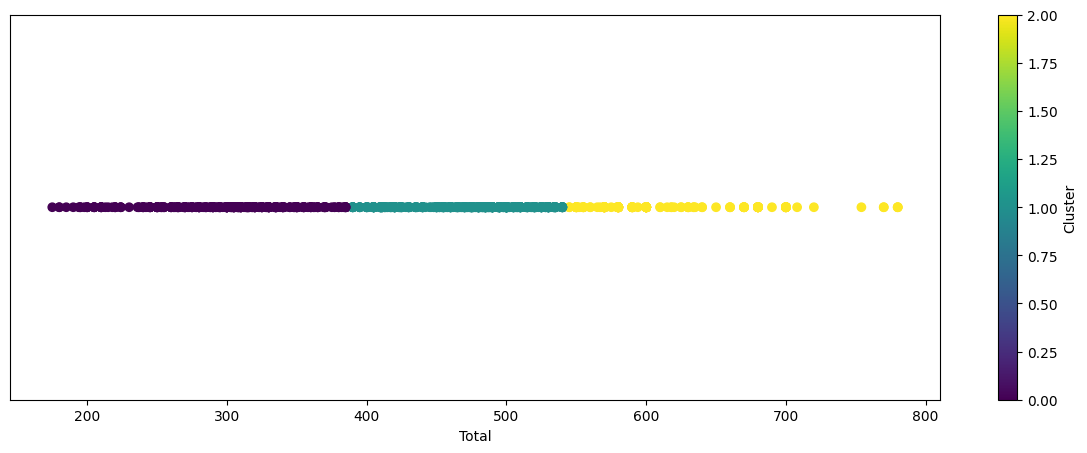

In [51]:
# Plot the total attribute
data = df['Total'].values

# Fit the K-Means model to the data
kmeans = KMeans(n_clusters=3)
kmeans.fit(data.reshape(-1, 1))

# Get the cluster assignments for each data point
clusters = kmeans.predict(data.reshape(-1, 1))

plt.figure(figsize=(15, 5))
plt.scatter(data, np.zeros_like(data), c=clusters, cmap='viridis')
plt.xlabel('Total')
plt.yticks([])
plt.colorbar(label='Cluster')
plt.show()

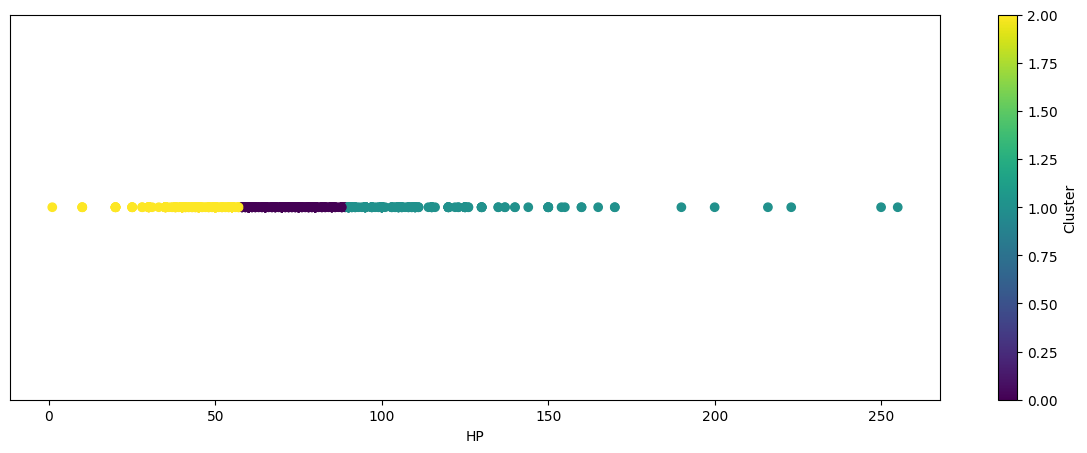

In [52]:
# Plot the HP attribute
data = df['HP'].values

# Fit the K-Means model to the data
kmeans = KMeans(n_clusters=3)
kmeans.fit(data.reshape(-1, 1))

# Get the cluster assignments for each data point
clusters = kmeans.predict(data.reshape(-1, 1))

plt.figure(figsize=(15, 5))
plt.scatter(data, np.zeros_like(data), c=clusters, cmap='viridis')
plt.xlabel('HP')
plt.yticks([])
plt.colorbar(label='Cluster')
plt.show()

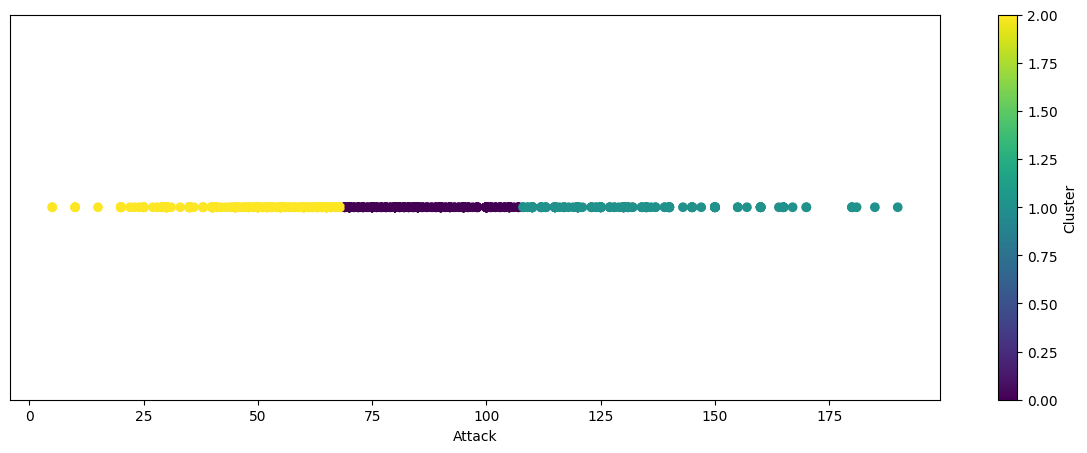

In [53]:
# Plot the Attack attribute
data = df['Attack'].values

# Fit the K-Means model to the data
kmeans = KMeans(n_clusters=3)
kmeans.fit(data.reshape(-1, 1))

# Get the cluster assignments for each data point
clusters = kmeans.predict(data.reshape(-1, 1))

plt.figure(figsize=(15, 5))
plt.scatter(data, np.zeros_like(data), c=clusters, cmap='viridis')
plt.xlabel('Attack')
plt.yticks([])
plt.colorbar(label='Cluster')
plt.show()

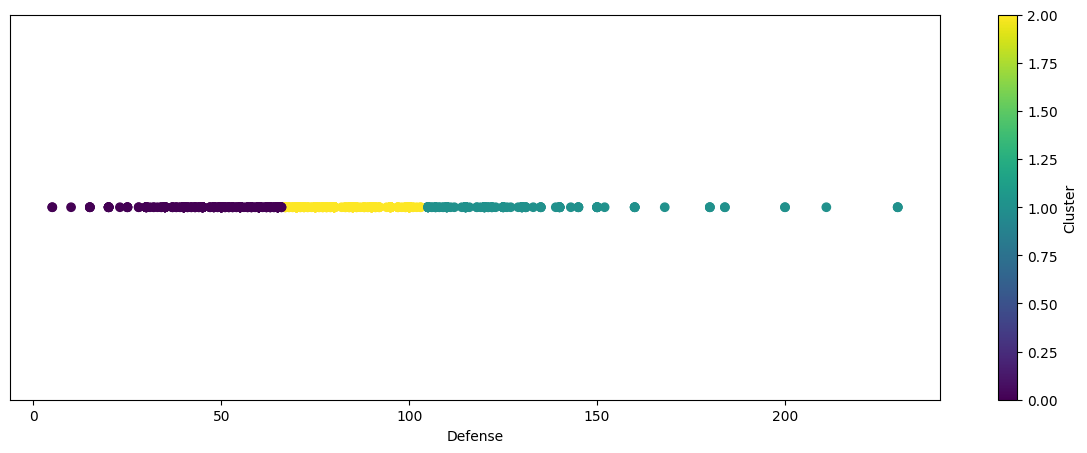

In [54]:
# Plot the Defense attribute
data = df['Defense'].values

# Fit the K-Means model to the data
kmeans = KMeans(n_clusters=3)
kmeans.fit(data.reshape(-1, 1))

# Get the cluster assignments for each data point
clusters = kmeans.predict(data.reshape(-1, 1))

plt.figure(figsize=(15, 5))
plt.scatter(data, np.zeros_like(data), c=clusters, cmap='viridis')
plt.xlabel('Defense')
plt.yticks([])
plt.colorbar(label='Cluster')
plt.show()

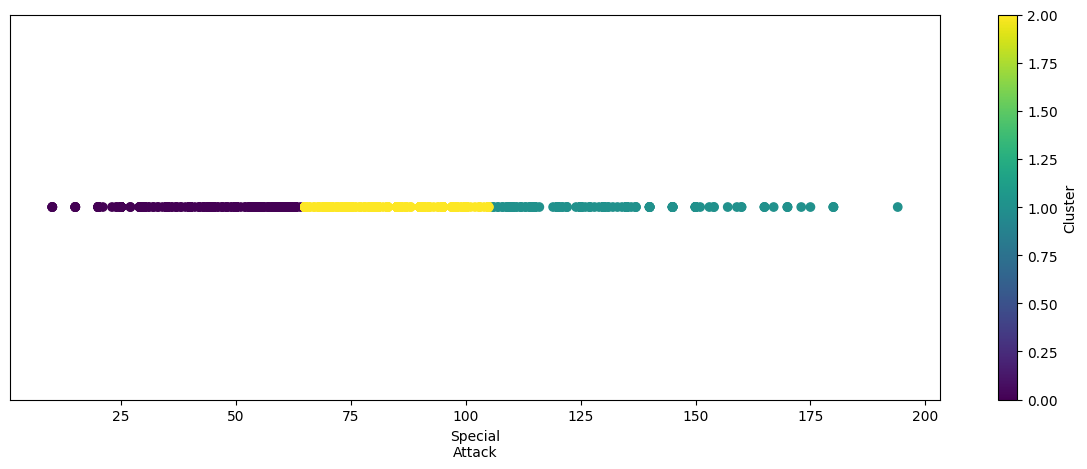

In [55]:
# Plot the Special Attack attribute
data = df['Special\nAttack'].values

# Fit the K-Means model to the data
kmeans = KMeans(n_clusters=3)
kmeans.fit(data.reshape(-1, 1))

# Get the cluster assignments for each data point
clusters = kmeans.predict(data.reshape(-1, 1))

plt.figure(figsize=(15, 5))
plt.scatter(data, np.zeros_like(data), c=clusters, cmap='viridis')
plt.xlabel('Special\nAttack')
plt.yticks([])
plt.colorbar(label='Cluster')
plt.show()

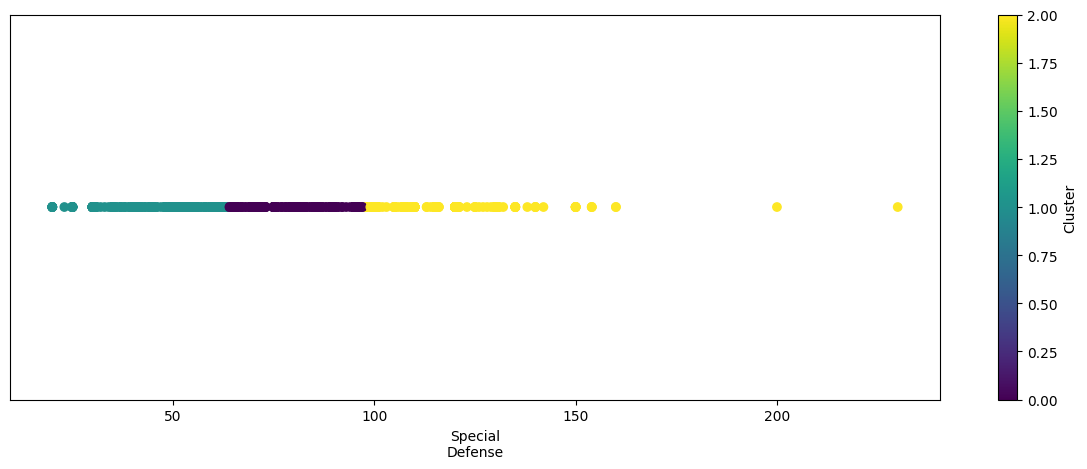

In [56]:
# Plot the Special Defense attribute
data = df['Special\nDefense'].values

# Fit the K-Means model to the data
kmeans = KMeans(n_clusters=3)
kmeans.fit(data.reshape(-1, 1))

# Get the cluster assignments for each data point
clusters = kmeans.predict(data.reshape(-1, 1))

plt.figure(figsize=(15, 5))
plt.scatter(data, np.zeros_like(data), c=clusters, cmap='viridis')
plt.xlabel('Special\nDefense')
plt.yticks([])
plt.colorbar(label='Cluster')
plt.show()

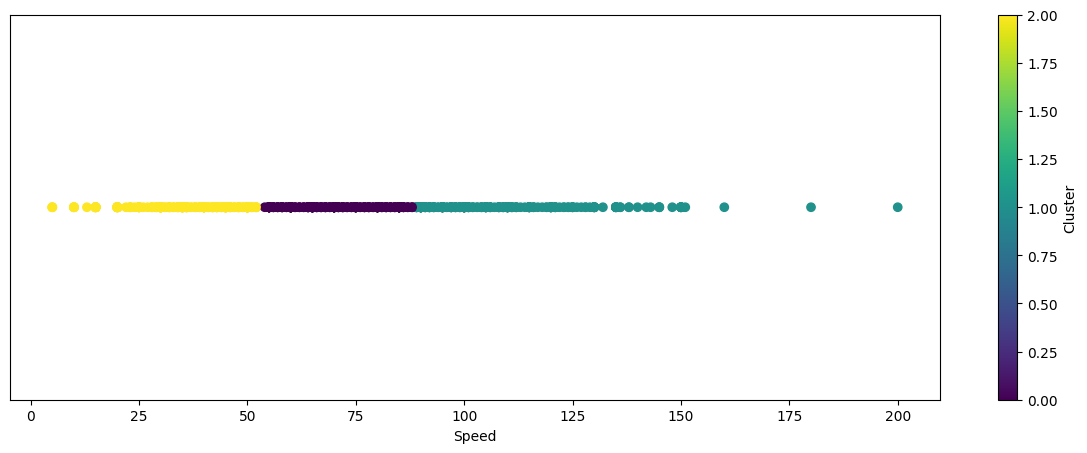

In [57]:
# Plot the Speed attribute
data = df['Speed'].values

# Fit the K-Means model to the data
kmeans = KMeans(n_clusters=3)
kmeans.fit(data.reshape(-1, 1))

# Get the cluster assignments for each data point
clusters = kmeans.predict(data.reshape(-1, 1))

plt.figure(figsize=(15, 5))
plt.scatter(data, np.zeros_like(data), c=clusters, cmap='viridis')
plt.xlabel('Speed')
plt.yticks([])
plt.colorbar(label='Cluster')
plt.show()

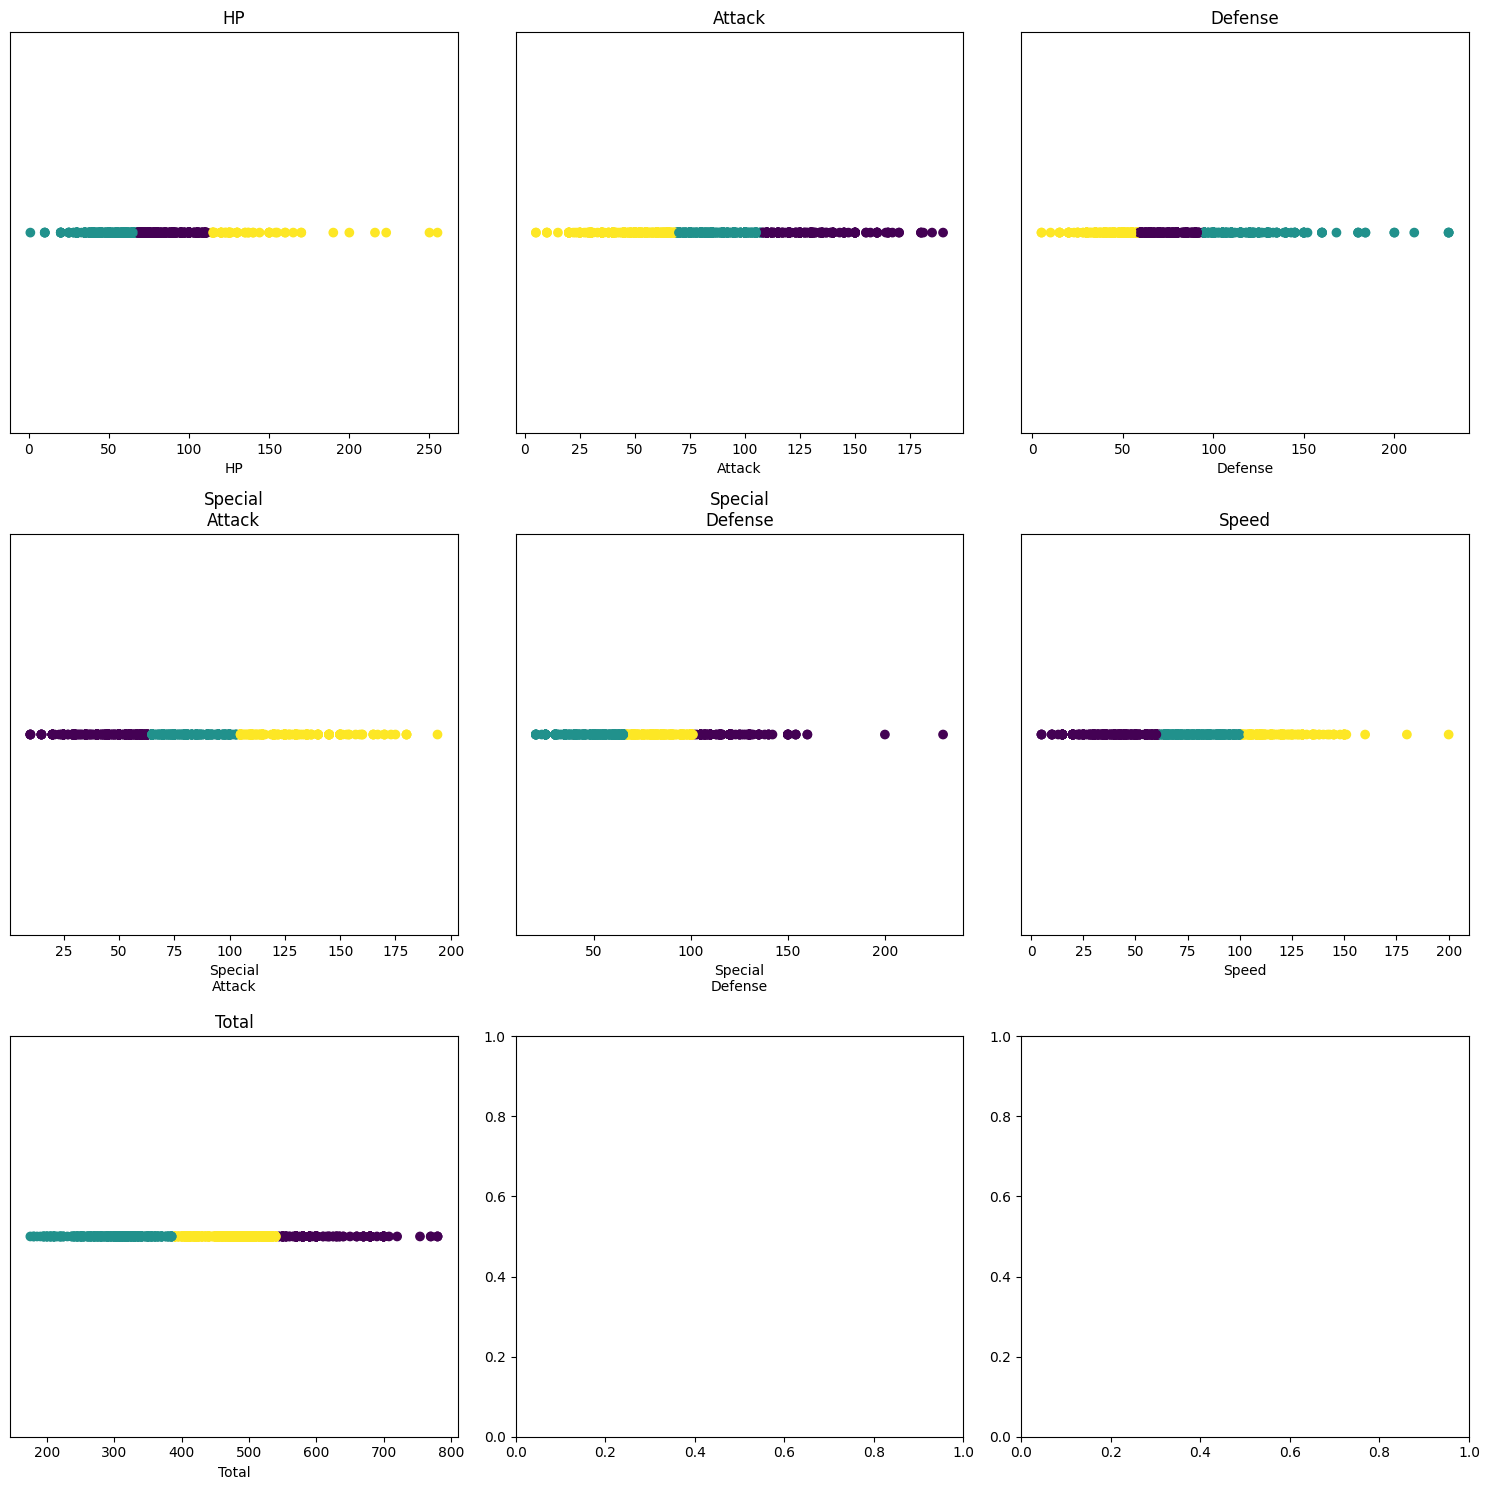

In [58]:
# plot all attributes in a single plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax = ax.ravel()
for i, attribute in enumerate(['HP', 'Attack', 'Defense', 'Special\nAttack', 'Special\nDefense', 'Speed', 'Total']):
    data = df[attribute].values
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(data.reshape(-1, 1))
    clusters = kmeans.predict(data.reshape(-1, 1))
    ax[i].scatter(data, [0]*len(data), c=clusters, cmap='viridis', marker='o')
    ax[i].set_title(attribute)
    ax[i].set_xlabel(attribute)
    ax[i].set_yticks([])

plt.tight_layout()
plt.show()


# 3D Clustering for each stats wtih the total stats vs Types {kmean}


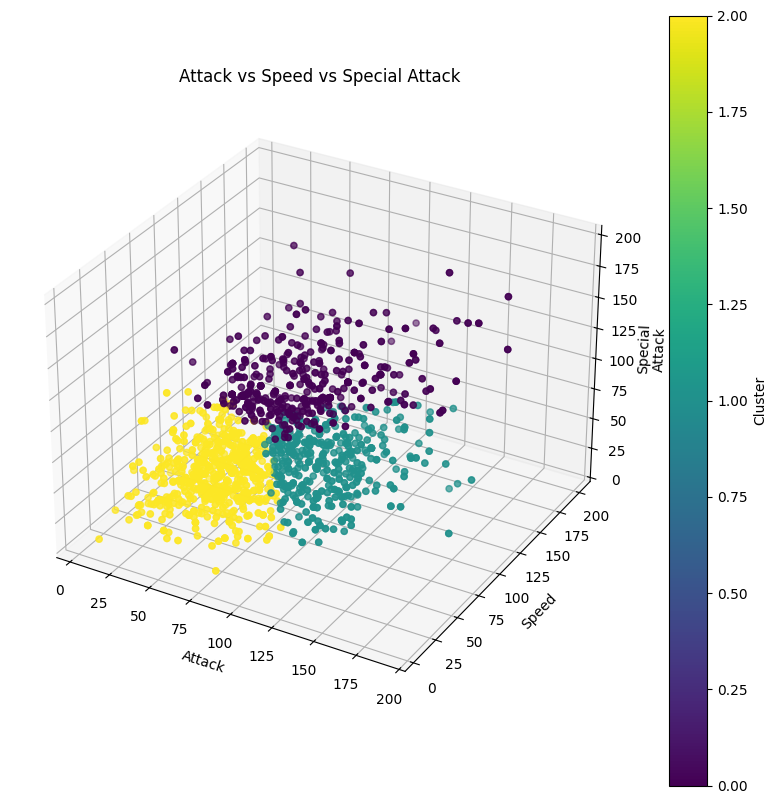

In [59]:
#Create a 3d kmean cluster model with 18 clusters
attributes = ['Attack', 'Speed', 'Special\nAttack']
labels = ['Type I', 'Type II']
plotTitle = 'Attack vs Speed vs Special Attack'

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[attributes])
clusters = kmeans.predict(df[attributes])
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis')
ax.set_xlabel(attributes[0])
ax.set_ylabel(attributes[1])
ax.set_zlabel(attributes[2])
plt.colorbar(ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis'), label='Cluster')
plt.title(plotTitle)
plt.show()

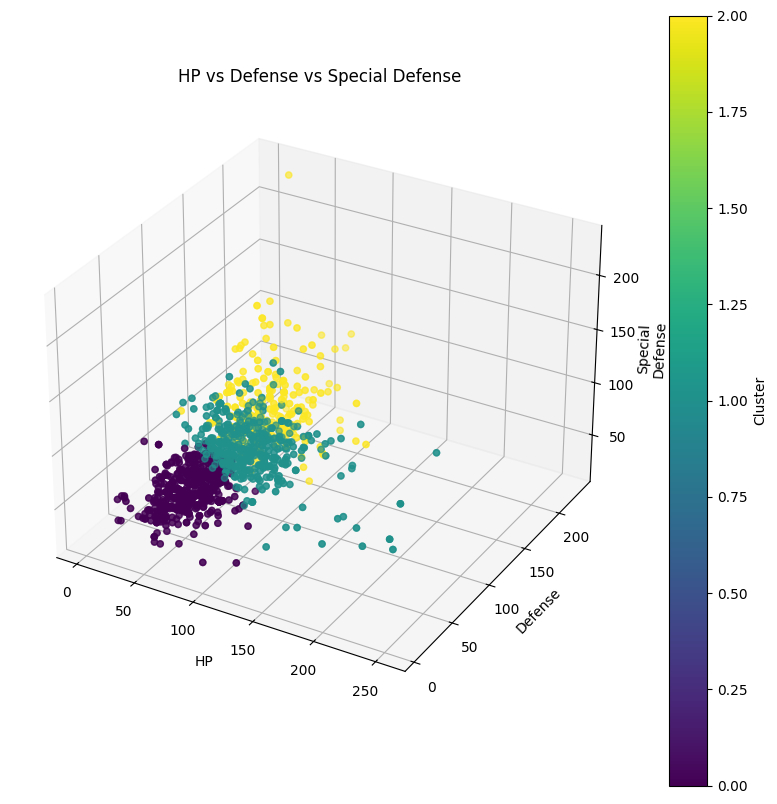

In [60]:
#Create a 3d kmean cluster model with 18 clusters
attributes = ['HP', 'Defense', 'Special\nDefense']
labels = ['Type I', 'Type II']
plotTitle = 'HP vs Defense vs Special Defense'

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[attributes])
clusters = kmeans.predict(df[attributes])
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis')
ax.set_xlabel(attributes[0])
ax.set_ylabel(attributes[1])
ax.set_zlabel(attributes[2])
plt.colorbar(ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis'), label='Cluster')
plt.title(plotTitle)
plt.show()


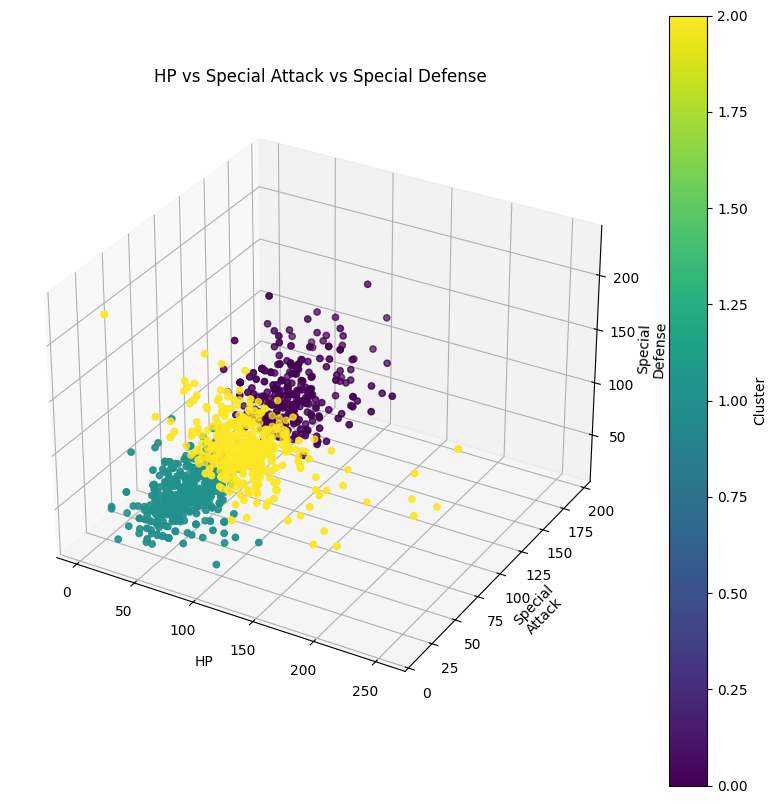

In [61]:
attributes = ['HP', 'Special\nAttack', 'Special\nDefense']
labels = ['Type I', 'Type II']
plotTitle = 'HP vs Special Attack vs Special Defense'

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[attributes])
clusters = kmeans.predict(df[attributes])
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis')
ax.set_xlabel(attributes[0])
ax.set_ylabel(attributes[1])
ax.set_zlabel(attributes[2])
plt.colorbar(ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis'), label='Cluster')
plt.title(plotTitle)
plt.show()

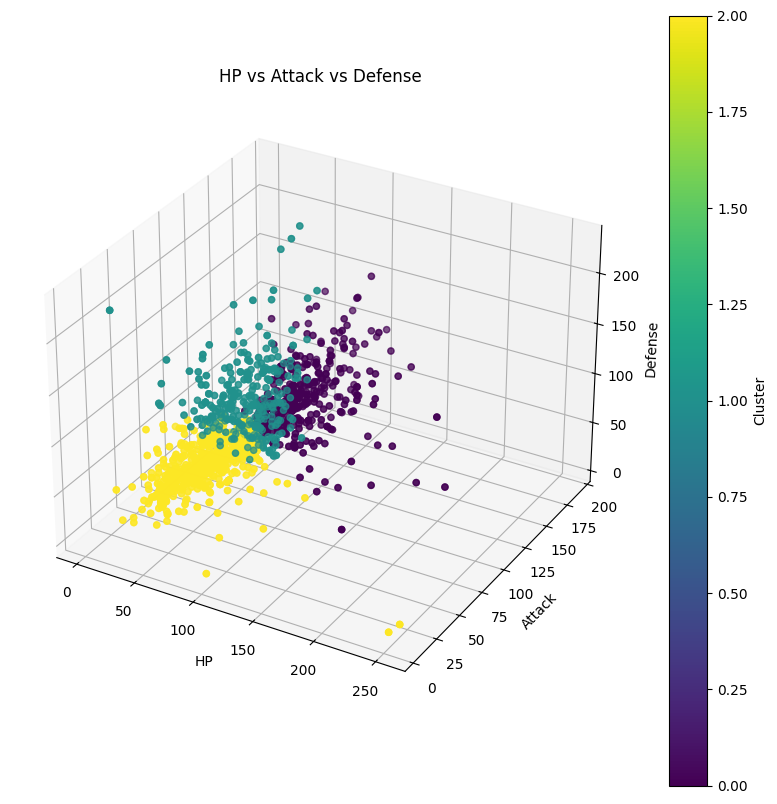

In [62]:
attributes = ['HP', 'Attack', 'Defense']
labels = ['Type I', 'Type II']
plotTitle = 'HP vs Attack vs Defense'

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[attributes])
clusters = kmeans.predict(df[attributes])
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis')
ax.set_xlabel(attributes[0])
ax.set_ylabel(attributes[1])
ax.set_zlabel(attributes[2])
plt.colorbar(ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis'), label='Cluster')
plt.title(plotTitle)
plt.show()

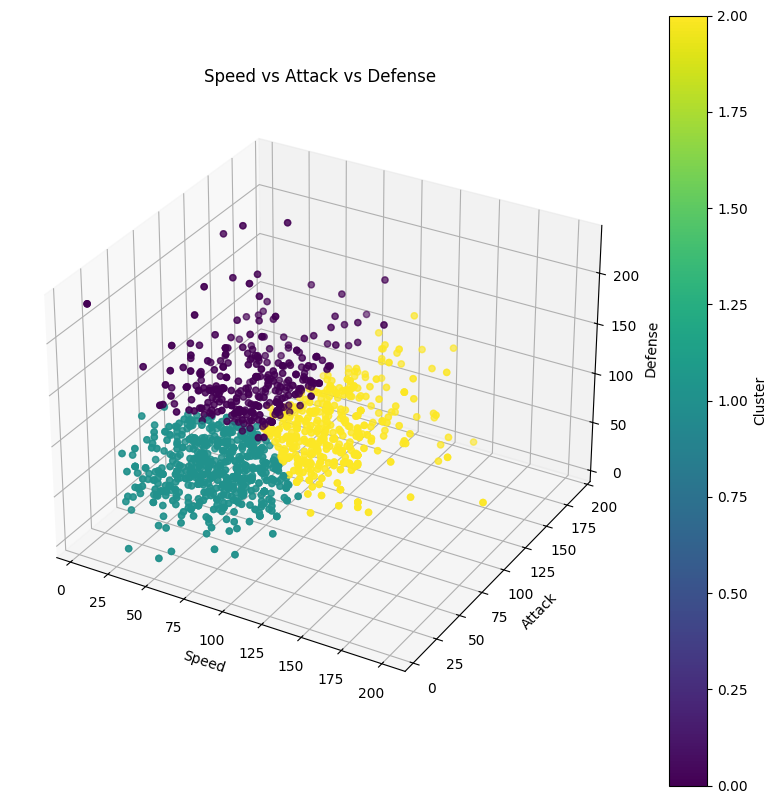

In [63]:
attributes = ['Speed', 'Attack', 'Defense']
labels = ['Type I', 'Type II']
plotTitle = 'Speed vs Attack vs Defense'

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[attributes])
clusters = kmeans.predict(df[attributes])
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis')
ax.set_xlabel(attributes[0])
ax.set_ylabel(attributes[1])
ax.set_zlabel(attributes[2])
plt.colorbar(ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis'), label='Cluster')
plt.title(plotTitle)
plt.show()

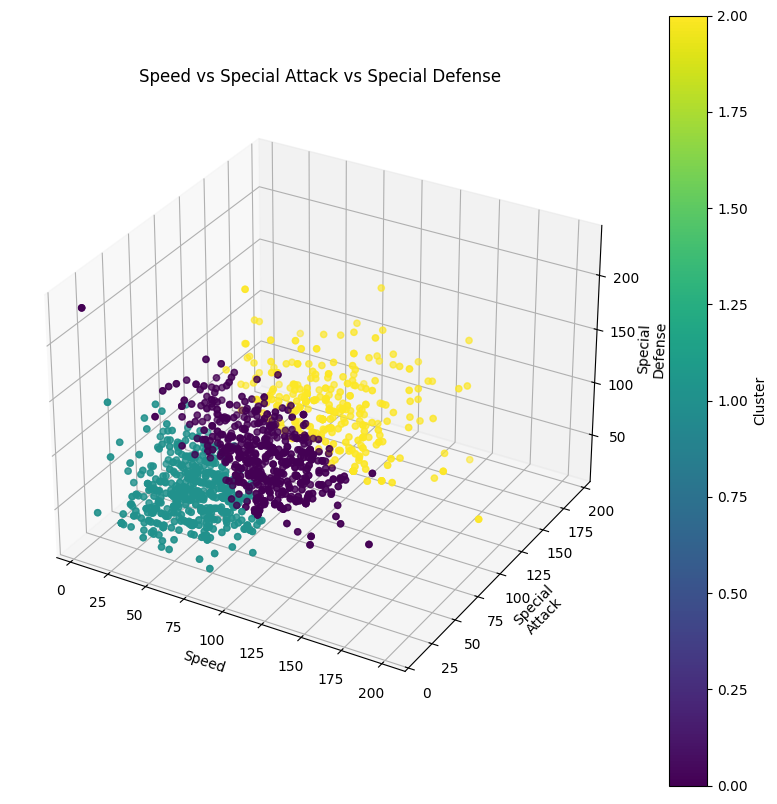

In [64]:
attributes = ['Speed', 'Special\nAttack', 'Special\nDefense']
labels = ['Type I', 'Type II']
plotTitle = 'Speed vs Special Attack vs Special Defense'

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[attributes])
clusters = kmeans.predict(df[attributes])
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis')
ax.set_xlabel(attributes[0])
ax.set_ylabel(attributes[1])
ax.set_zlabel(attributes[2])
plt.colorbar(ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis'), label='Cluster')
plt.title(plotTitle)
plt.show()

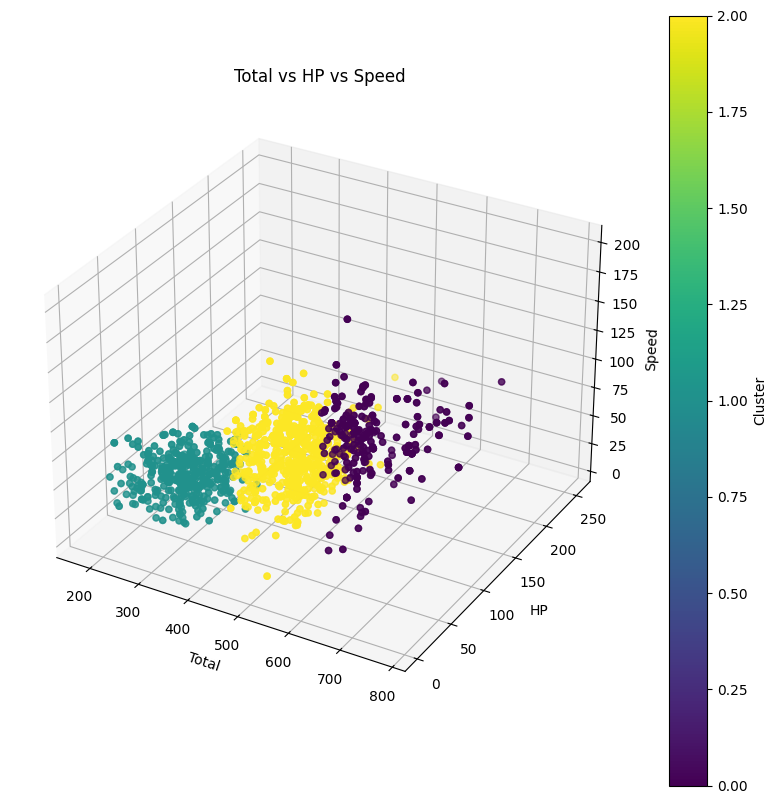

In [65]:
attributes = ['Total', 'HP', 'Speed']
labels = ['Type I', 'Type II']
plotTitle = 'Total vs HP vs Speed'

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[attributes])
clusters = kmeans.predict(df[attributes])
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis')
ax.set_xlabel(attributes[0])
ax.set_ylabel(attributes[1])
ax.set_zlabel(attributes[2])
plt.colorbar(ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis'), label='Cluster')
plt.title(plotTitle)
plt.show()

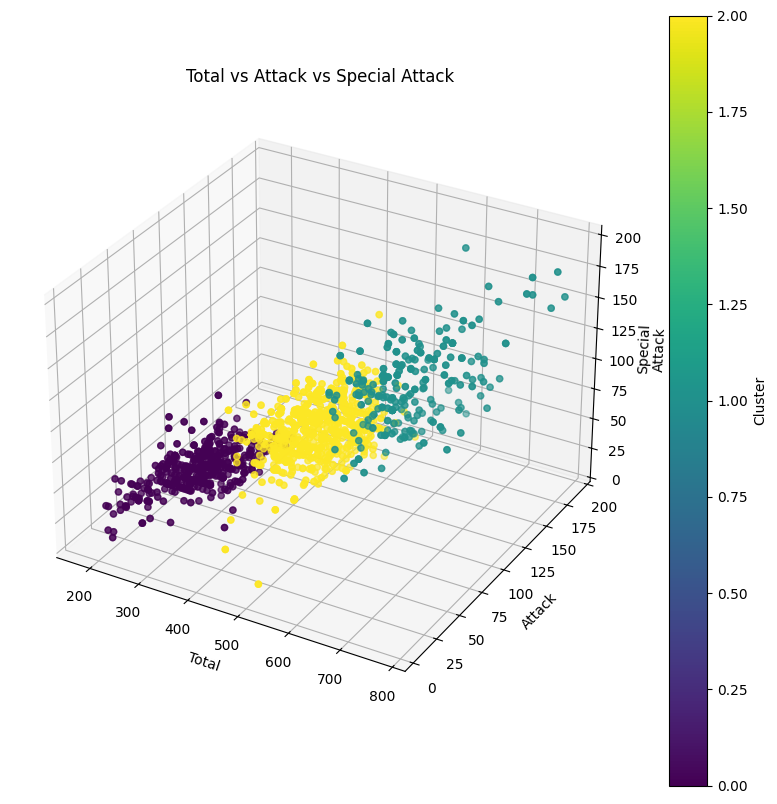

In [66]:
attributes = ['Total', 'Attack', 'Special\nAttack']
labels = ['Type I', 'Type II']
plotTitle = 'Total vs Attack vs Special Attack'

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[attributes])
clusters = kmeans.predict(df[attributes])
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis')
ax.set_xlabel(attributes[0])
ax.set_ylabel(attributes[1])
ax.set_zlabel(attributes[2])
plt.colorbar(ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis'), label='Cluster')
plt.title(plotTitle)
plt.show()

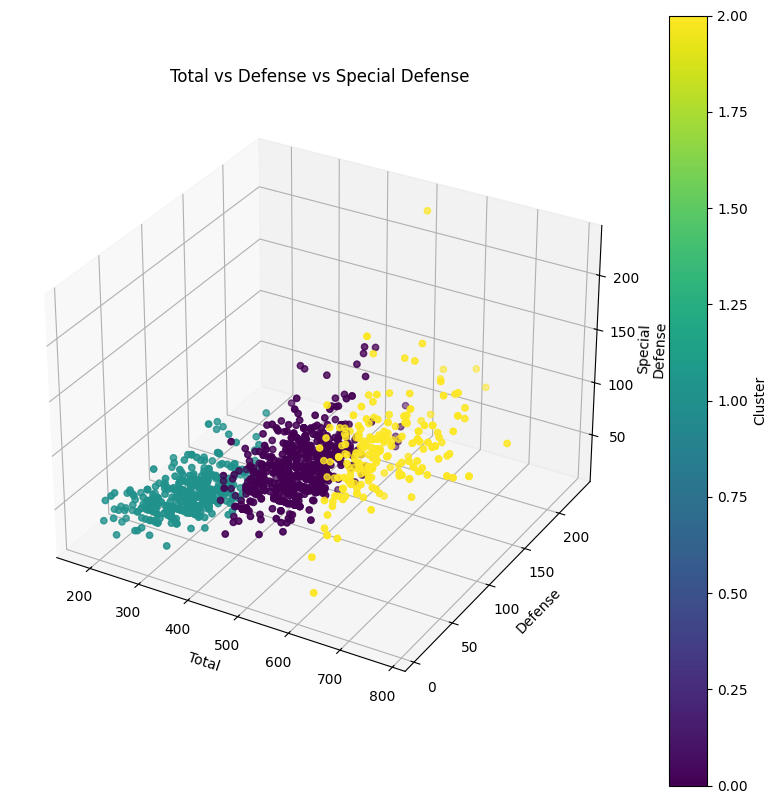

In [67]:
attributes = ['Total', 'Defense', 'Special\nDefense']
labels = ['Type I', 'Type II']
plotTitle = 'Total vs Defense vs Special Defense'

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[attributes])
clusters = kmeans.predict(df[attributes])
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis')
ax.set_xlabel(attributes[0])
ax.set_ylabel(attributes[1])
ax.set_zlabel(attributes[2])
plt.colorbar(ax.scatter(df[attributes[0]], df[attributes[1]], df[attributes[2]], c=clusters, cmap='viridis'), label='Cluster')
plt.title(plotTitle)
plt.show()

# 5D Clustering for each stats wtih the total stats vs Types {kmean}

Text(0.5, 0.92, 'HP vs Attack vs Defense vs Special Attack vs Special Defense')

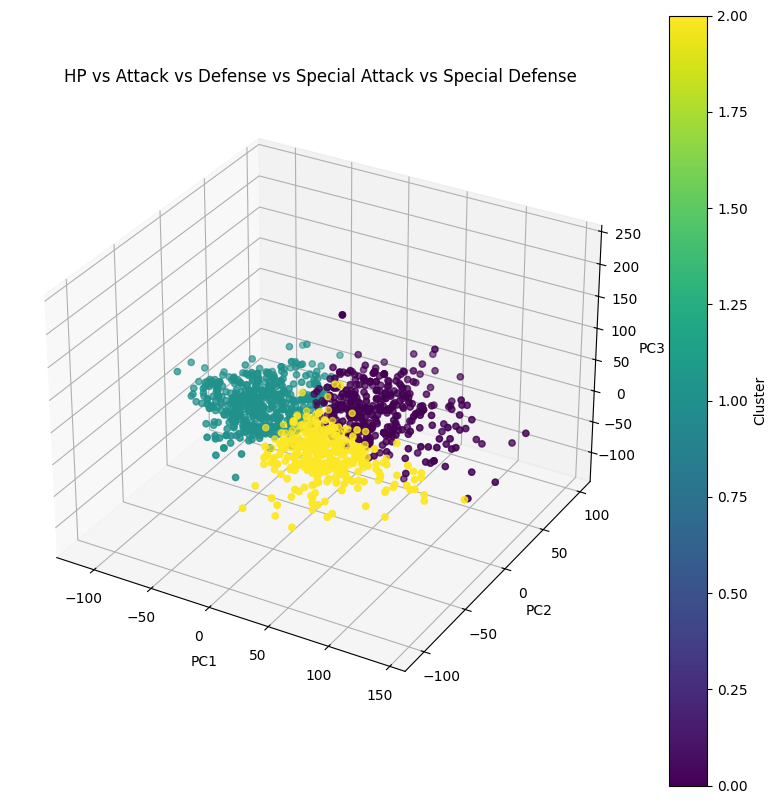

In [68]:
attributes = ['HP', 'Attack', 'Defense', 'Special\nAttack', 'Special\nDefense']
labels = ['Type I', 'Type II']
plotTitle = 'HP vs Attack vs Defense vs Special Attack vs Special Defense'

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[attributes])
clusters = kmeans.predict(df[attributes])
pca = PCA(n_components=3)
pca.fit(df[attributes])
X = pca.transform(df[attributes])
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis'), label='Cluster')
plt.title(plotTitle)



Text(0.5, 0.92, 'Speed vs Attack vs Defense vs Special Attack vs Special Defense')

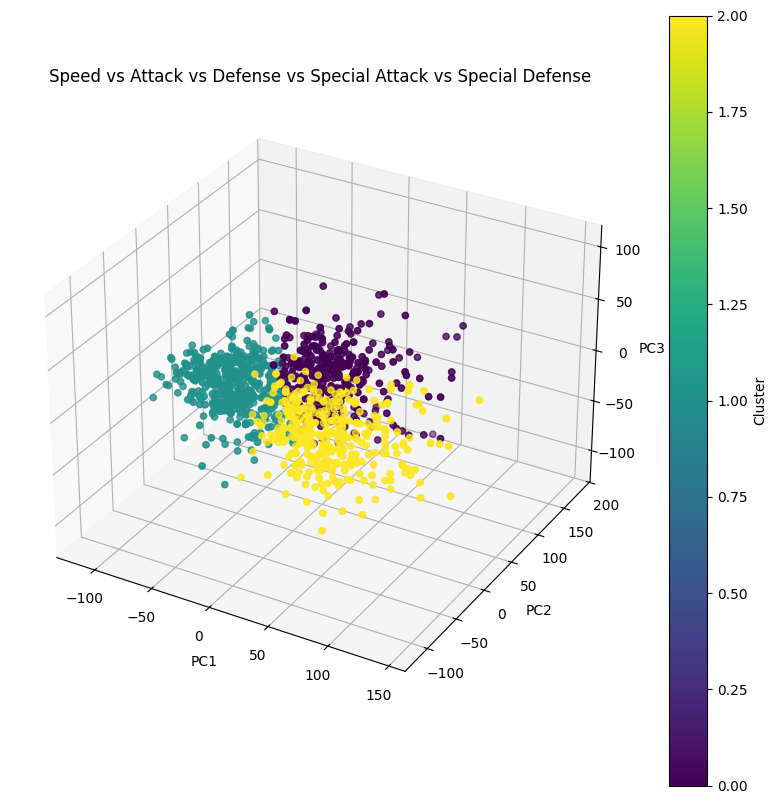

In [69]:
attributes = ['Speed', 'Attack', 'Defense', 'Special\nAttack', 'Special\nDefense']
labels = ['Type I', 'Type II']
plotTitle = 'Speed vs Attack vs Defense vs Special Attack vs Special Defense'

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[attributes])
clusters = kmeans.predict(df[attributes])
pca = PCA(n_components=3)
pca.fit(df[attributes])
X = pca.transform(df[attributes])
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis'), label='Cluster')
plt.title(plotTitle)


Text(0.5, 0.92, 'Total vs Attack vs Defense vs Special Attack vs Special Defense')

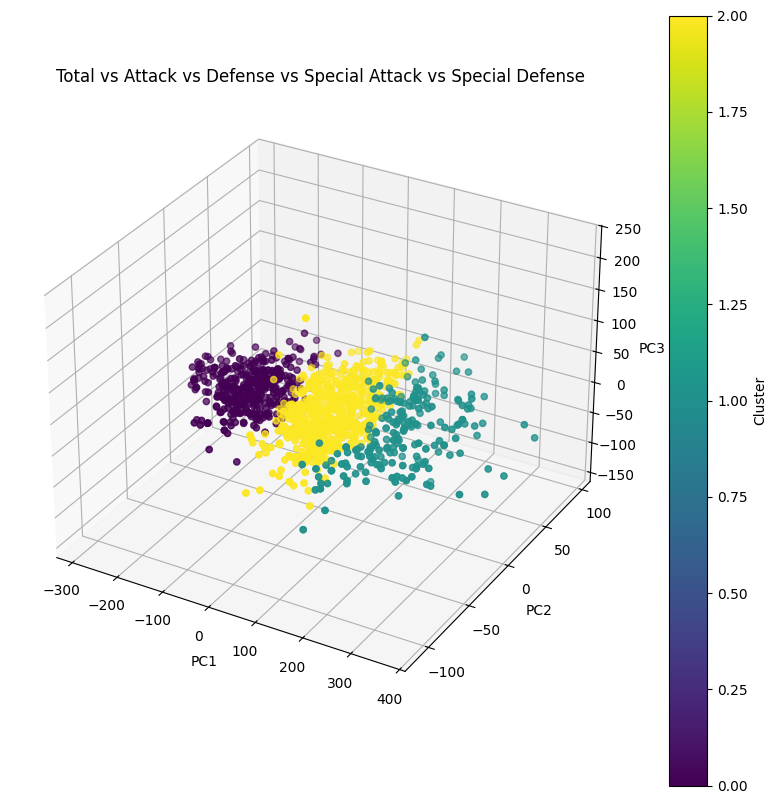

In [70]:
attributes = ['Total', 'Attack', 'Defense', 'Special\nAttack', 'Special\nDefense']
labels = ['Type I', 'Type II']
plotTitle = 'Total vs Attack vs Defense vs Special Attack vs Special Defense'

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[attributes])
clusters = kmeans.predict(df[attributes])
pca = PCA(n_components=3)
pca.fit(df[attributes])
X = pca.transform(df[attributes])
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis'), label='Cluster')
plt.title(plotTitle)

In [ ]:
attributes = ['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed', 'Total']
labels = ['Type I', 'Type II']
plotTitle = 'HP vs Attack vs Defense vs Special Attack vs Special Defense vs Speed vs Total'

X = data[attributes].dropna()

kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(X)

if len(attributes) > 2:
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X)
    x_axis, y_axis = reduced_X[:, 0], reduced_X[:, 1]
    xlabel, ylabel = 'Principal Component 1', 'Principal Component 2'
else:
    if len(attributes) == 1:
        x_axis = X[attributes[0]]
        y_axis = np.zeros_like(x_axis)
        xlabel, ylabel = attributes[0], 'Value'
    else:
        y_axis = np.zeros_like(X[attributes[0]])
        x_axis, y_axis = X[attributes[0]], X[attributes[1]]
        xlabel, ylabel = attributes[0], attributes[1]

plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_axis, c=data['cluster'], cmap='viridis', marker='o')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(plotTitle)
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
attributes = ['Attack', 'Special Attack', 'Defense', 'Special Defense', 'Speed', 'Total']
labels = ['Type I', 'Type II']
plotTitle = 'All stats except HP'

X = data[attributes].dropna()

kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(X)

if len(attributes) > 2:
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X)
    x_axis, y_axis = reduced_X[:, 0], reduced_X[:, 1]
    xlabel, ylabel = 'Principal Component 1', 'Principal Component 2'
else:
    if len(attributes) == 1:
        x_axis = X[attributes[0]]
        y_axis = np.zeros_like(x_axis)
        xlabel, ylabel = attributes[0], 'Value'
    else:
        y_axis = np.zeros_like(X[attributes[0]])
        x_axis, y_axis = X[attributes[0]], X[attributes[1]]
        xlabel, ylabel = attributes[0], attributes[1]

plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_axis, c=data['cluster'], cmap='viridis', marker='o')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(plotTitle)
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

df = pd.read_csv("..\data\Tabular Dataset.csv")

# Affiche les premières lignes pour vérifier le chargement
# print(df.head())

## Variables
name = df["Pokemon Name"].tolist()
weight=df["Weight (kg)"].tolist()
height=df["Height (m)"].tolist()
type=df["Type I"].tolist()

weight=weight[0:len(weight)-2]
height=height[0:len(height)-2]

## K-Means function

def kmeans(data, K, N):
    # Initialisation des centres avec des points aléatoires
    moy = [random.choice(data) for _ in range(K)]
    mean0 = deepcopy(moy)  # Initialiser mean0 comme copie de moy pour la comparaison

    while True:
        Zn = []
        
        # Affectation des points au cluster le plus proche
        for n in range(N):
            xn = data[n]
            # Calcul des distances aux centres actuels
            centreliste = [np.abs(muk - xn) for muk in moy]
            # Trouver l'indice du centre le plus proche
            indicezn = np.argmin(centreliste)
            Zn.append(indicezn)  # On stocke l'indice du centre le plus proche pour chaque point
        
        # Mise à jour des centres en fonction des affectations
        mean0 = deepcopy(moy)  # Stocker la configuration actuelle pour la comparaison
        moy = []
        
        for k in range(K):
            # Récupérer tous les points affectés au centre k
            Xk = [data[i] for i in range(N) if Zn[i] == k]
            # Calculer la nouvelle moyenne si Xk n'est pas vide
            if Xk:
                muk = np.mean(Xk)
            else:
                muk = random.choice(data)  # Réinitialise à un point aléatoire s'il n'y a aucun point assigné
            moy.append(muk)
        
        # Condition de sortie : Si les centres ne changent plus
        if moy == mean0:
            break

    return Zn, moy


## Kmeans double clustering

def kmeansdouble(data1, data2, K, N):
    # Combiner les données en une liste de points (x, y)
    data = [(data1[i], data2[i]) for i in range(N)]
    
    # Initialisation des centres avec des points aléatoires de data
    moy = [random.choice(data) for _ in range(K)]
    mean0 = deepcopy(moy)  # Copie initiale des moyennes pour la condition d'arrêt

    while True:
        # Affectations de clusters pour chaque point
        Zn = []
        
        for point in data:
            # Calcul des distances aux centres actuels
            centreliste = [np.sqrt((point[0] - muk[0])**2 + (point[1] - muk[1])**2) for muk in moy]
            # Trouver l'indice du centre le plus proche
            indicezn = np.argmin(centreliste)
            Zn.append(indicezn)  # Ajoute l'indice du centre le plus proche pour chaque point
        
        # Mise à jour des centres
        mean0 = deepcopy(moy)  # Stocker la configuration actuelle pour comparaison
        moy = []
        
        for k in range(K):
            # Récupérer tous les points affectés au centre k
            Xk = [data[i] for i in range(N) if Zn[i] == k]
            # Calculer la nouvelle moyenne si Xk n'est pas vide
            if Xk:
                # Calcul des moyennes x et y pour les nouveaux centres
                muk_x = np.mean([point[0] for point in Xk])
                muk_y = np.mean([point[1] for point in Xk])
                muk = (muk_x, muk_y)
            else:
                # Si aucun point assigné, réinitialiser aléatoirement
                muk = random.choice(data)
            moy.append(muk)
        
        # Condition d'arrêt : Si les centres ne changent plus
        if moy == mean0:
            break

    return Zn, moy


## Weight and height clustering

ZnWH,moyWH = kmeansdouble(weight, height, 18, len(weight))


# Liste de couleurs pour chaque classe
couleurs = [
    'red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'brown', 
    'pink', 'olive', 'gray', 'yellow', 'teal', 'navy', 'lime', 'darkred', 
    'gold', 'darkgreen'
]


# Affichage des points avec une couleur par classe
plt.figure(1,figsize=(10, 2))
for i, valeur in enumerate(weight):
    oneheight=height[i]
    classe = ZnWH[i]
    plt.scatter(valeur, oneheight, color=couleurs[classe], label=f'Class {classe}' if f'Class {classe}' not in plt.gca().get_legend_handles_labels()[1] else "")

# Ajout des étiquettes et légende
plt.xlabel("Index")
plt.yticks([1]) 
plt.title("Weight, Height and classes")
plt.legend(title="Classes", loc='upper right', bbox_to_anchor=(1.15, 1))

# Affichage de la ligne horizontale
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)
plt.show()


## Weight clustering

Zn, moy=kmeans(weight,18,len(weight))


# Liste de couleurs pour chaque classe
couleurs = [
    'red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'brown', 
    'pink', 'olive', 'gray', 'yellow', 'teal', 'navy', 'lime', 'darkred', 
    'gold', 'darkgreen'
]


# Affichage des points avec une couleur par classe
plt.figure(2,figsize=(10, 2))
for i, valeur in enumerate(weight):
    classe = Zn[i]
    plt.scatter(valeur, 1, color=couleurs[classe], label=f'Class {classe}' if f'Class {classe}' not in plt.gca().get_legend_handles_labels()[1] else "")

# Ajout des étiquettes et légende
plt.xlabel("Index")
plt.yticks([1]) 
plt.title("Weight and classes")
plt.legend(title="Classes", loc='upper right', bbox_to_anchor=(1.15, 1))

# Affichage de la ligne horizontale
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)
plt.show()


## Height clustering

Znheight, moyheight=kmeans(height,18,len(height))



# Liste de couleurs pour chaque classe
couleurs = [
    'red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'brown', 
    'pink', 'olive', 'gray', 'yellow', 'teal', 'navy', 'lime', 'darkred', 
    'gold', 'darkgreen'
]


# Affichage des points avec une couleur par classe
plt.figure(3,figsize=(10, 2))
for i, valeur in enumerate(height):
    classe = Znheight[i]
    plt.scatter(valeur, 1, color=couleurs[classe], label=f'Class {classe}' if f'Class {classe}' not in plt.gca().get_legend_handles_labels()[1] else "")

# Ajout des étiquettes et légende
plt.xlabel("Index")
plt.yticks([1]) 
plt.title("Height and classes")
plt.legend(title="Classes", loc='upper right', bbox_to_anchor=(1.15, 1))

# Affichage de la ligne horizontale
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\maxfe\AppData\Local\Temp\ipykernel_91100\3748450584.py:7: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data\Tabular Dataset.csv")
C:\Users\maxfe\AppData\Local\Temp\ipykernel_91100\3748450584.py:7: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data\Tabular Dataset.csv")


KeyError: 'Pokemon\nName'